In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
def chisq(a):
    a=np.asarray(a)
    hi=0
    m=a.shape[0]
    n=a.shape[1]
    for i in range (m-1):
        for j in range (n-1):
            hi+=a[i][j]**2/a[i][n-1]/a[m-1][j]
    hi-=1
    hi*=a[m-1][n-1]
    ro=np.sqrt(hi/(hi+a[m-1][n-1]))
    c=np.sqrt(hi/a[m-1][n-1]/min(m-2,n-2))
    p=1-stats.chi2.cdf(hi,(m-2)*(n-2))
    return (hi,p,ro,c)

Считываем и задаём нужные данные

In [2]:
data=pd.read_csv("./StudentsPerformance.csv")
data1=data[['gender', 'reading score']].copy()
data2=data[['test preparation course','writing score']].copy()
data3=data[['math score' , 'reading score']].copy()
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data1['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [4]:
data2.describe()

,writing score
count,1000.000000
mean,68.054000
std,15.195657
min,10.000000
25%,57.750000
50%,69.000000
75%,79.000000
max,100.000000


In [5]:
data3.describe()

,math score,reading score
count,1000.00000,1000.000000
mean,66.08900,69.169000
std,15.16308,14.600192
min,0.00000,17.000000
25%,57.00000,59.000000
50%,66.00000,70.000000
75%,77.00000,79.000000
max,100.00000,100.000000


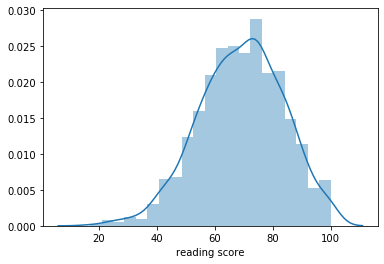

In [6]:
sns.distplot(data['reading score'])

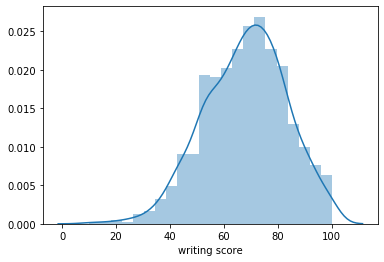

In [7]:
sns.distplot(data['writing score'])

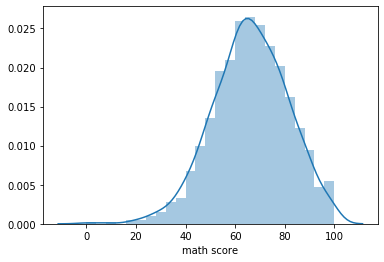

In [8]:
sns.distplot(data['math score'])

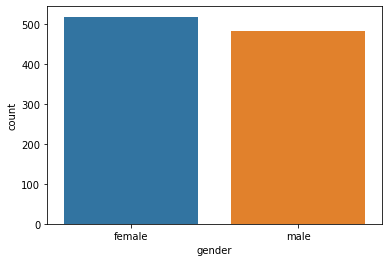

In [9]:
sns.countplot(data['gender'])

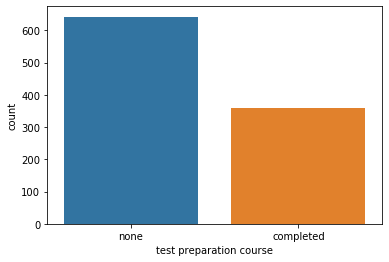

In [10]:
sns.countplot(data['test preparation course'])

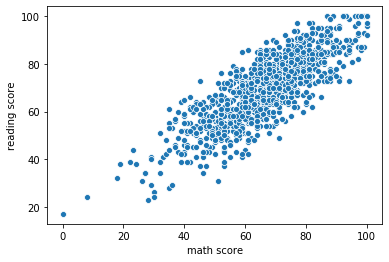

In [11]:
sns.scatterplot(data["math score"],data['reading score'])

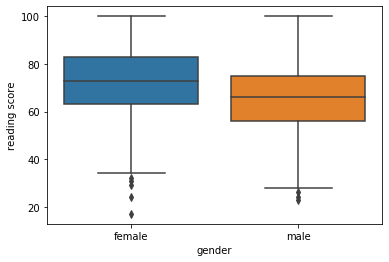

In [12]:
sns.boxplot(data["gender"],data['reading score'])

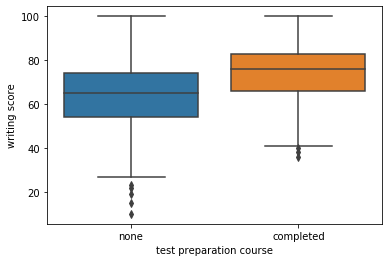

In [13]:
sns.boxplot(data["test preparation course"],data['writing score'])

In [14]:
pd.crosstab(data["gender"],pd.qcut(data['reading score'],4),margins=True)

reading score,"(16.999, 59.0]","(59.0, 70.0]","(70.0, 79.0]","(79.0, 100.0]",All
gender,,,,,
female,91,125,135,167,518
male,163,134,103,82,482
All,254,259,238,249,1000


In [39]:
chisq(pd.crosstab(data["gender"],pd.qcut(data['reading score'],4),margins=True))

(52.81322133191657,
 2.009403754499317e-11,
 0.2239729983027918,
 0.229811273291622)

In [45]:
stats.chi2_contingency(pd.crosstab(data["gender"],pd.qcut(data['reading score'],4)))

(52.813221331916594,
 2.0094052944404405e-11,
 3,
 array([[131.572, 134.162, 123.284, 128.982],
        [122.428, 124.838, 114.716, 120.018]]))

In [41]:
pd.crosstab(data["test preparation course"],pd.qcut(data['writing score'],4),margins=True)

writing score,"(9.999, 57.75]","(57.75, 69.0]","(69.0, 79.0]","(79.0, 100.0]",All
test preparation course,,,,,
completed,42,78,106,132,358
none,208,183,148,103,642
All,250,261,254,235,1000


In [49]:
chisq(pd.crosstab(data["test preparation course"],pd.qcut(data['writing score'],4),margins=True))

(89.55623205716678, 0.0, 0.28669695605690626, 0.2992594727943742)

In [50]:
stats.chi2_contingency(pd.crosstab(data["test preparation course"],pd.qcut(data['writing score'],4)))

(89.55623205716677,
 2.728160671232579e-19,
 3,
 array([[ 89.5  ,  93.438,  90.932,  84.13 ],
        [160.5  , 167.562, 163.068, 150.87 ]]))

In [16]:
pd.crosstab(pd.qcut(data["math score"],4),pd.qcut(data['reading score'],4),margins=True)

reading score,"(16.999, 59.0]","(59.0, 70.0]","(70.0, 79.0]","(79.0, 100.0]",All
math score,,,,,
"(-0.001, 57.0]",185,64,17,0,266
"(57.0, 66.0]",53,107,66,15,241
"(66.0, 77.0]",16,79,99,70,264
"(77.0, 100.0]",0,9,56,164,229
All,254,259,238,249,1000


In [24]:
np.asarray(pd.crosstab(pd.qcut(data["math score"],4),pd.qcut(data['reading score'],4),margins=True))[1][2]

66

In [46]:
chisq(pd.crosstab(pd.qcut(data["math score"],4),pd.qcut(data['reading score'],4),margins=True))

(735.7899297420263, 0.0, 0.6510709792432334, 0.4952406585832879)

In [32]:
stats.chi2_contingency(pd.crosstab(pd.qcut(data["math score"],4),pd.qcut(data['reading score'],4)))

(735.7899297420263,
 1.3924388437519744e-152,
 9,
 array([[67.564, 68.894, 63.308, 66.234],
        [61.214, 62.419, 57.358, 60.009],
        [67.056, 68.376, 62.832, 65.736],
        [58.166, 59.311, 54.502, 57.021]]))